In [ ]:
# Basic regression to predict fuel efficiency
# Code is based on this tutorial: https://www.tensorflow.org/tutorials/keras/regression
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
from google.colab import drive
dataset = pd.read_csv('/content/sample_data/math.csv')
column_names = ['sex','age','studytime','absences','G1','G2','G3']


In [ ]:
dataset.head()

,sex,age,studytime,absences,G1,G2,G3
0,2,18,2,6,25,30,30
1,2,17,2,4,25,25,30
2,2,15,2,10,35,40,50
3,2,15,3,2,75,70,75
4,2,16,2,4,30,50,50


In [ ]:
# clean data
dataset = dataset.dropna()

# convert categorical 'sex' data into one-hot data
sex = dataset.pop('sex')
dataset['M'] = (sex == 1)*1
dataset['F'] = (sex == 2)*1


In [ ]:
dataset.head()

,age,studytime,absences,G1,G2,G3,M,F
0,18,2,6,25,30,30,0,1
1,17,2,4,25,25,30,0,1
2,15,2,10,35,40,50,0,1
3,15,3,2,75,70,75,0,1
4,16,2,4,30,50,50,0,1


In [ ]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(395, 8) (316, 8) (79, 8)


,count,mean,std,min,25%,50%,75%,max
age,316.0,16.696203,1.288330,15.0,16.0,17.0,18.0,22.0
studytime,316.0,2.037975,0.842416,1.0,1.0,2.0,2.0,4.0
absences,316.0,5.655063,8.045387,0.0,0.0,4.0,8.0,75.0
G1,316.0,53.844937,16.388479,15.0,40.0,50.0,65.0,95.0
G2,316.0,53.117089,18.610858,0.0,40.0,50.0,65.0,95.0
G3,316.0,51.518987,22.877929,0.0,40.0,55.0,65.0,95.0
M,316.0,0.458861,0.499095,0.0,0.0,0.0,1.0,1.0
F,316.0,0.541139,0.499095,0.0,0.0,1.0,1.0,1.0


In [ ]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('G3')
test_labels = test_features.pop('G3')

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('G3')
    plt.legend()

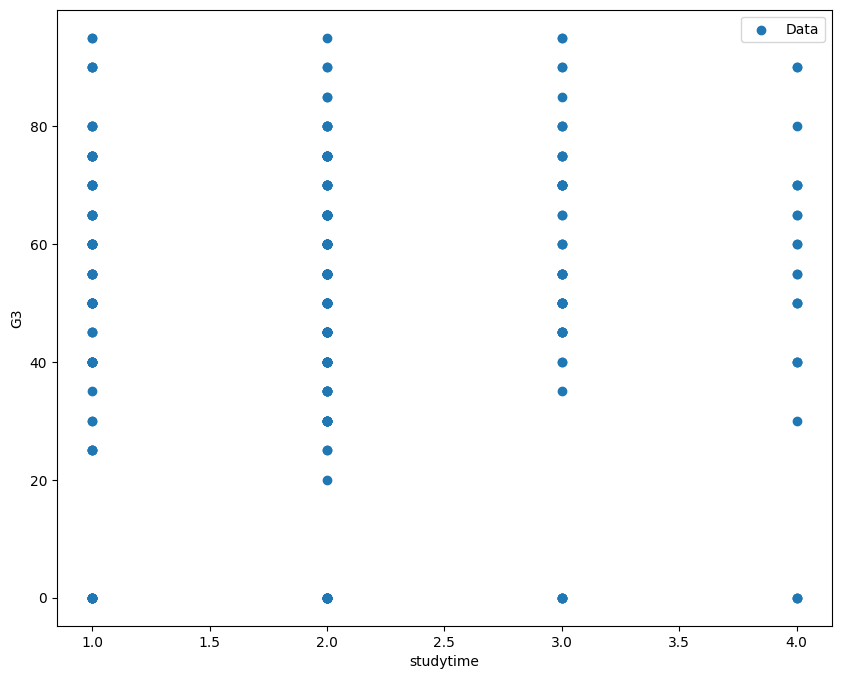

In [ ]:
plot('studytime')

In [ ]:
# Normalize
print(train_dataset.describe().transpose()[['mean', 'std']])

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

                mean        std
age        16.696203   1.288330
studytime   2.037975   0.842416
absences    5.655063   8.045387
G1         53.844937  16.388479
G2         53.117089  18.610858
G3         51.518987  22.877929
M           0.458861   0.499095
F           0.541139   0.499095
[[16.696  2.038  5.655 53.845 53.117  0.459  0.541]]


In [ ]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[17  3  4 70 70  0  1]]
Normalized: [[ 0.236  1.144 -0.206  0.987  0.909 -0.921  0.921]]


In [ ]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

#single_feature_model.compile(optimizer=optim, loss=loss)

In [ ]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [ ]:
linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 50.0976 - val_loss: 55.2447
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 49.3212 - val_loss: 54.4538
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 48.5353 - val_loss: 53.5976
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 47.7707 - val_loss: 52.7863
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 47.0082 - val_loss: 51.9670
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 46.2508 - val_loss: 51.1366
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 45.5136 - val_loss: 50.2702
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 44.7287 - val_loss: 49.4307
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 43.9660 - val_loss: 48.6141
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 43.1887 - val_loss: 47.8224
Epoch 11

In [ ]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 4.0200


4.020045757293701